In [35]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from data import resample_nba_data as re
from data import clean_and_split_nba_data as clean
from sklearn.linear_model import LogisticRegression
from models import plot_validation_curve as vc
from models import eval_model as evm
from joblib import dump

In [2]:
df = pd.read_csv("../data/raw/train.csv")
df

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2996,11794,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,...,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1
7996,11679,11795,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,...,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1
7997,5537,11796,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,...,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1
7998,1292,11797,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,...,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1


In [3]:
x_data, x_train, x_val, x_test, y_data , y_train, y_val,  y_test = clean.clean_and_split_nba_data(df)

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', '3P Made', '3PA', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'CALC3P%', 'CALCFG%',
       'CALCFT%'],
      dtype='object')


In [7]:
scaler = StandardScaler()
dump(scaler, '../models/sp_wk3_scaler_logistic_regression.joblib')

['../models/sp_wk3_scaler_logistic_regression.joblib']

In [9]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.833594
0    0.166406
Name: TARGET_5Yrs, dtype: float64
1    0.833594
0    0.166406
Name: TARGET_5Yrs, dtype: float64
1    0.83375
0    0.16625
Name: TARGET_5Yrs, dtype: float64


In [10]:
x_train = scaler.fit_transform(x_train) 
x_test =  scaler.fit_transform(x_test) 
x_val =  scaler.fit_transform(x_val) 

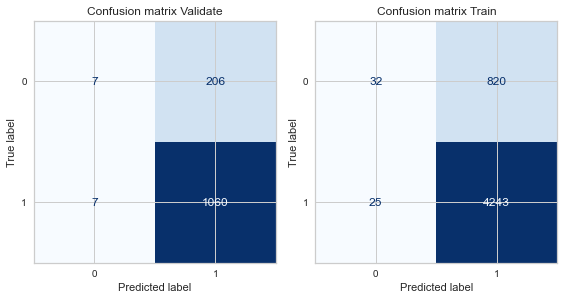

LogisticRegression(random_state=0)


(LogisticRegression(random_state=0), 0.7071678744758461, 0.7150538344091415)

In [18]:
evm.eval_model(LogisticRegression(random_state=0),x_train,y_train,x_val,y_val)

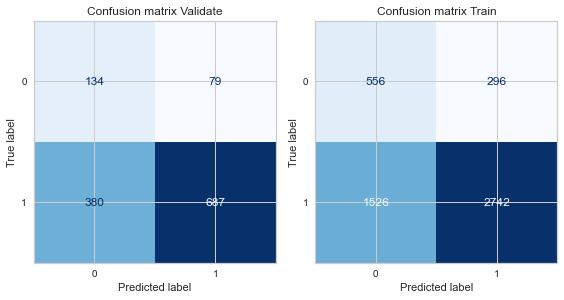

LogisticRegression(class_weight={0: 0.84, 1: 0.17}, random_state=0)


(LogisticRegression(class_weight={0: 0.84, 1: 0.17}, random_state=0),
 0.7071249741498036,
 0.7152166356464309)

In [19]:
evm.eval_model(LogisticRegression(random_state=0,class_weight={1:0.17,0:0.84}),x_train,y_train,x_val,y_val)

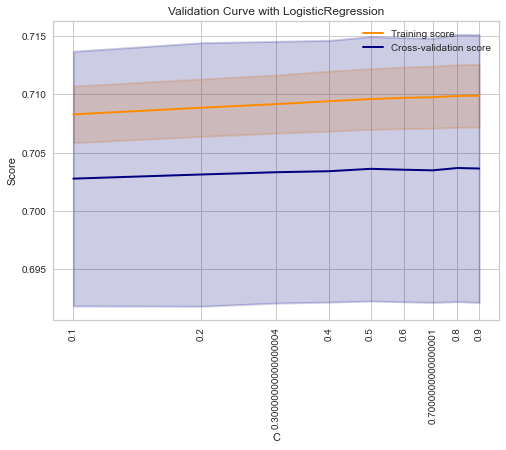

In [52]:
vc.plot_validation_curve(estimator=LogisticRegression(random_state=0,max_iter=100000),
                    hyperparameter='C',
                    hyperparameter_value=np.arange(.1,1.0,.1),
                    x=x_data,
                    y=y_data,
                    title="LogisticRegression",
                    cv=5)

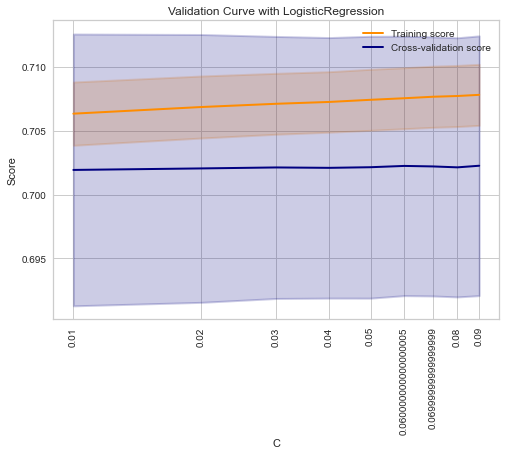

In [53]:
vc.plot_validation_curve(estimator=LogisticRegression(random_state=0,class_weight={1:0.17,0:0.84},max_iter=100000),
                    hyperparameter='C',
                    hyperparameter_value=np.arange(.01,.1,.01),
                    x=x_data,
                    y=y_data,
                    title="LogisticRegression",
                    cv=5)

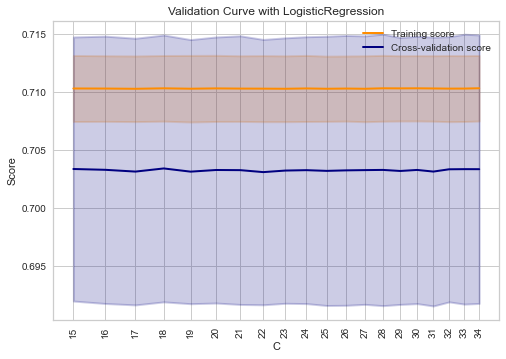

In [48]:
vc.plot_validation_curve(estimator=LogisticRegression(random_state=0,class_weight={1:0.17,0:0.84},max_iter=100000),
                    hyperparameter='C',
                    hyperparameter_value=np.arange(15,35,1),
                    x=x_data,
                    y=y_data,
                    title="LogisticRegression",
                    cv=5)

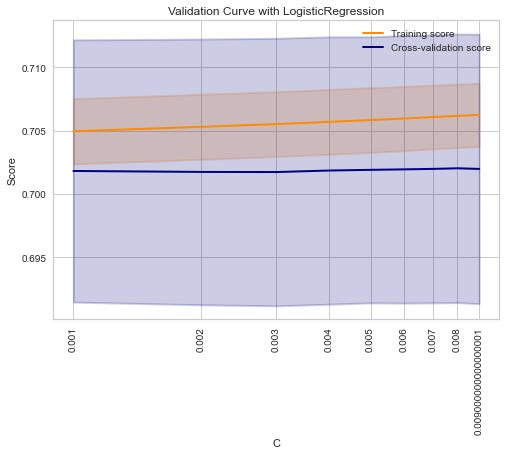

In [55]:
vc.plot_validation_curve(estimator=LogisticRegression(random_state=0,class_weight={1:0.17,0:0.84},max_iter=100000),
                    hyperparameter='C',
                    hyperparameter_value=np.arange(.001,.01,.001),
                    x=x_data,
                    y=y_data,
                    title="LogisticRegression",
                    cv=5)

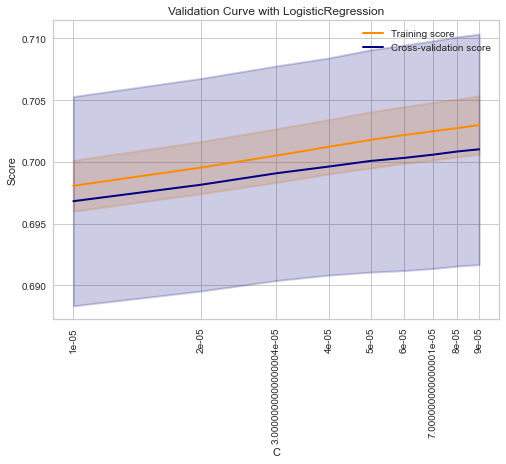

In [56]:
vc.plot_validation_curve(estimator=LogisticRegression(random_state=0,class_weight={1:0.17,0:0.84},max_iter=100000),
                    hyperparameter='C',
                    hyperparameter_value=np.arange(.00001,.0001,.00001),
                    x=x_data,
                    y=y_data,
                    title="LogisticRegression",
                    cv=5)

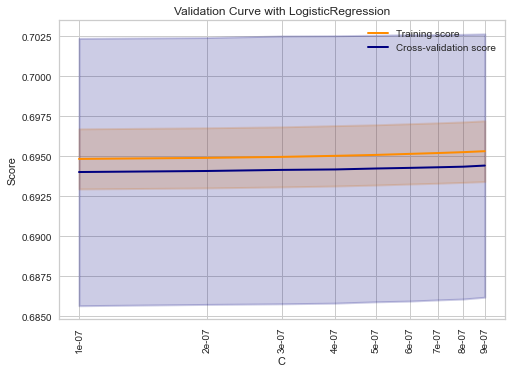

In [57]:
vc.plot_validation_curve(estimator=LogisticRegression(random_state=0,class_weight={1:0.17,0:0.84},max_iter=100000),
                    hyperparameter='C',
                    hyperparameter_value=np.arange(.0000001,.000001,.0000001),
                    x=x_data,
                    y=y_data,
                    title="LogisticRegression",
                    cv=5)

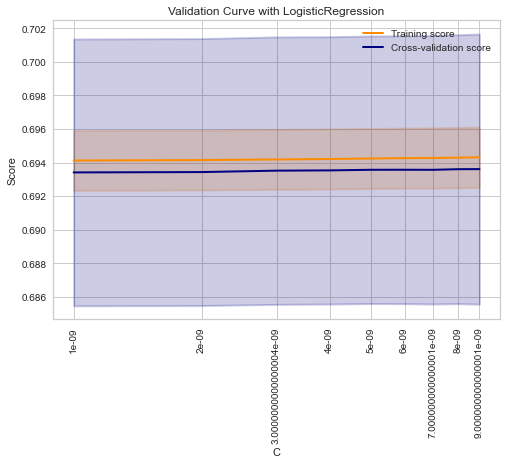

In [58]:
vc.plot_validation_curve(estimator=LogisticRegression(random_state=0,class_weight={1:0.17,0:0.84},max_iter=100000),
                    hyperparameter='C',
                    hyperparameter_value=np.arange(.000000001,.00000001,.000000001),
                    x=x_data,
                    y=y_data,
                    title="LogisticRegression",
                    cv=5)

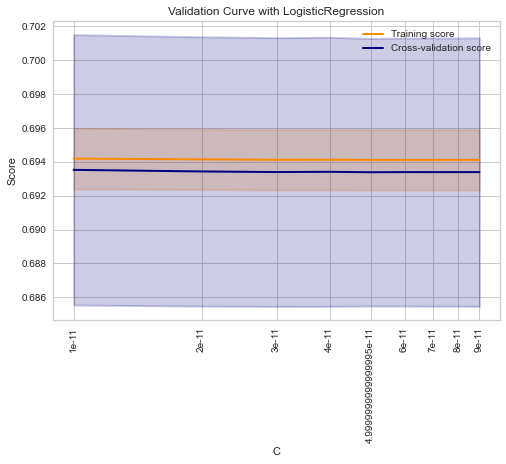

In [59]:
vc.plot_validation_curve(estimator=LogisticRegression(random_state=0,class_weight={1:0.17,0:0.84},max_iter=100000),
                    hyperparameter='C',
                    hyperparameter_value=np.arange(.00000000001,.0000000001,.00000000001),
                    x=x_data,
                    y=y_data,
                    title="LogisticRegression",
                    cv=5)

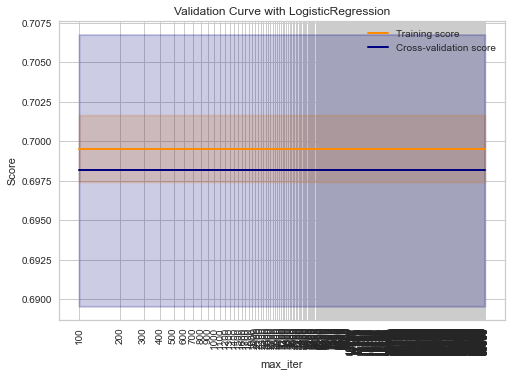

In [61]:
vc.plot_validation_curve(estimator=LogisticRegression(random_state=0,
                                                      class_weight={1:0.17,0:0.84},
                                                      C=0.00002),
                    hyperparameter='max_iter',
                    hyperparameter_value=range(100,100000,100),
                    x=x_data,
                    y=y_data,
                    title="LogisticRegression",
                    cv=5)

In [62]:
lr1=LogisticRegression(random_state=0,
                  class_weight={1:0.17,0:0.84},
                  C=0.00002)

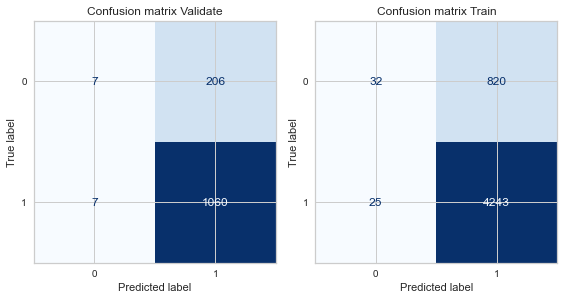

LogisticRegression(random_state=0)


(LogisticRegression(random_state=0), 0.7071678744758461, 0.7150538344091415)

In [63]:
evm.eval_model(LogisticRegression(random_state=0),x_train,y_train,x_val,y_val)

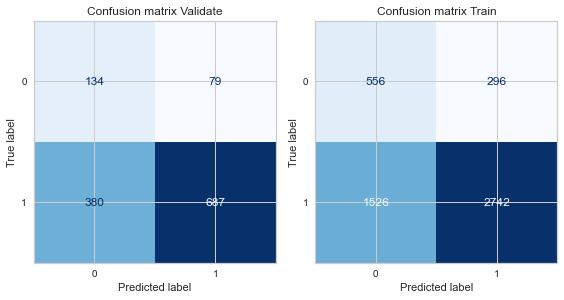

LogisticRegression(class_weight={0: 0.84, 1: 0.17}, random_state=0)


(LogisticRegression(class_weight={0: 0.84, 1: 0.17}, random_state=0),
 0.7071249741498036,
 0.7152166356464309)

In [67]:
lr=LogisticRegression(random_state=0,class_weight={1:0.17,0:0.84})
evm.eval_model(lr,x_train,y_train,x_val,y_val)

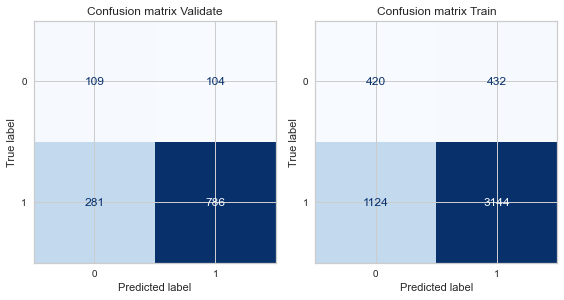

LogisticRegression(C=2e-05, class_weight={0: 0.84, 1: 0.17}, random_state=0)


(LogisticRegression(C=2e-05, class_weight={0: 0.84, 1: 0.17}, random_state=0),
 0.6751166558865848,
 0.6976693022866973)

In [65]:
evm.eval_model(lr1,x_train,y_train,x_val,y_val)

(0.6953083608571654,
 0.645,
 0.7515310586176728,
 0.9023109243697479,
 0.643928035982009,
 0.645)

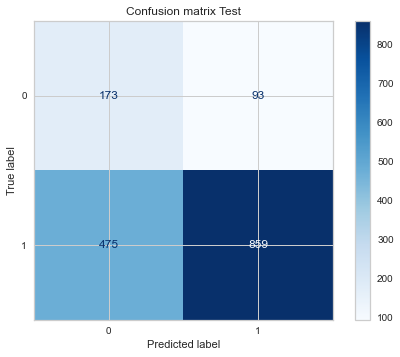

In [68]:
evm.get_performance(lr, x_test, y_test, "Test", True)

(0.6844923402960175,
 0.696875,
 0.8013109381401066,
 0.8834688346883469,
 0.7331334332833583,
 0.696875)

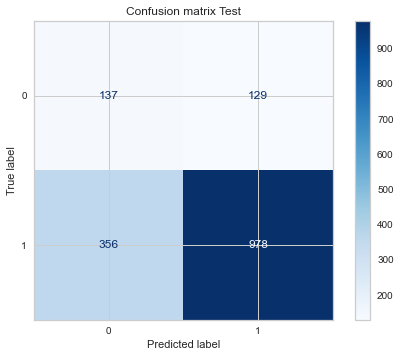

In [70]:
evm.get_performance(lr1, x_test, y_test, "Test", True)

In [71]:
dump(lr1,  '../models/sp_wk3_logistic_reg_model.joblib')

['../models/sp_wk3_logistic_reg_model.joblib']